In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mpltern

In [2]:
# example dataset
example_df = pd.DataFrame(
    {
        "sample_id": ["S1", "S2", "S3", "S4", "S5", "S6", "S7"],
        "sand": [65, 70, 75, 80, 35, 99.8, 97.2],
        "silt": [20, 24, 21, 16, 45, 0.2, 2.8],
        "clay": [15, 6, 4, 4, 20, 0.0, 0.0],
        "BD": [1.002, 1.277, 1.008, 1.927, 1.774, 1.66, 1.68], #random values for BD
    }
)

In [3]:
# Check texture classes from soiltexture package
from soiltexture import getTexture
example_df.apply(
    lambda row: getTexture(row['sand'], row['clay']), axis=1
)

0    sandy loam
1    sandy loam
2    loamy sand
3    loamy sand
4          loam
5          None
6          None
dtype: object

In [4]:
# example_df.to_csv("example_soil_data.csv", index=False)

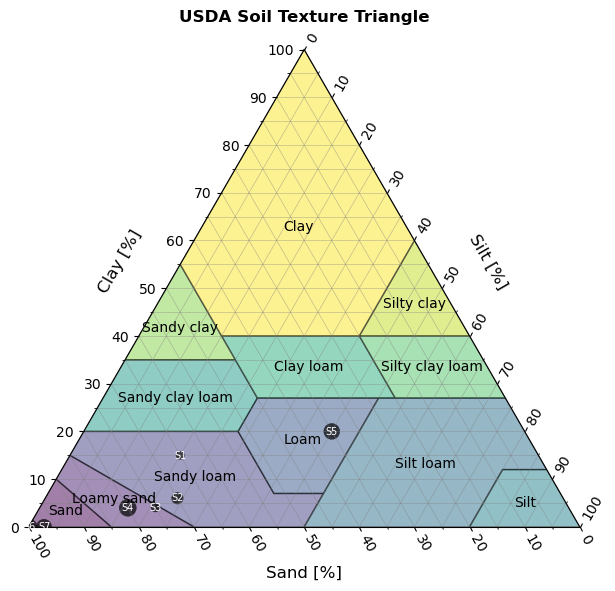

In [5]:
from soiltextureplot.triangle import SoilTextureTriangle

tri = SoilTextureTriangle(system_name="USDA")
tri.load_dataframe(example_df)
fig, ax = tri.plot(size_by="BD", cmap="viridis")

In [6]:
tri.classify()

,sample_id,sand,silt,clay,BD,texture_class
0,S1,65.0,20.0,15.0,1.002,sandy loam
1,S2,70.0,24.0,6.0,1.277,sandy loam
2,S3,75.0,21.0,4.0,1.008,loamy sand
3,S4,80.0,16.0,4.0,1.927,loamy sand
4,S5,35.0,45.0,20.0,1.774,loam
5,S6,99.8,0.2,0.0,1.660,sand
6,S7,97.2,2.8,0.0,1.680,Unknown


In [7]:
from soiltextureplot.systems import list_texture_systems

list_texture_systems()

{'USDA': 'United States Department of Agriculture (USDA) Soil Texture Classification',
 'HYPRES': 'The HYdraulic PRoperties of European Soils (HYPRES) is a European framework for classifying soils based on their hydrologic properties'}